In [2]:
import pymysql
import json
import os
import networkx as nx
import freeman as fm
from unidecode import unidecode

def run_db_query(connection, query, args=None):
    with connection.cursor() as cursor:
        print('Executando query:')
        cursor.execute(query, args)
        for result in cursor:
            print(result)
            
with open('config_tests.json', 'r') as f:
    config = json.load(f)

conn = pymysql.connect(
    host=config['HOST'],
    user=config['USER'],
    password=config['PASS'],
    database='imdb'
)

In [86]:
id_genero = 28

with open('twomode1.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 1\n')
        
        movie_ids = []
        
        cursor.execute("SELECT id_filme, title FROM filme INNER JOIN filme_genero using (id_filme) WHERE id_genero = %s", id_genero)
        res = cursor.fetchall()

        for i in res:
            file.write('  node [\n')
            file.write('    id "f_{}"\n'.format(i[0]))
            file.write('    type "filme"\n')
            file.write('    label "{}"\n'.format(unidecode(i[1])))
            file.write('  ]\n')
            movie_ids.append(i[0])

        cursor.execute("SELECT id_keyword, nome FROM keyword")
        res = cursor.fetchall()

        for i in res:
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i[0]))
            file.write('    type "keyword"\n')
            file.write('    label "{}"\n'.format(unidecode(i[1])))
            file.write('  ]\n')

        for filme in movie_ids:
            cursor.execute("SELECT id_keyword FROM filme_keyword WHERE id_filme = %s", filme)
            keys = cursor.fetchall()
            
            for key in keys:
                file.write('  edge [\n')
                file.write('    source "f_{}"\n'.format(filme))
                file.write('    target "k_{}"\n'.format(key[0]))
                file.write('  ]\n')

        file.write(']\n')

In [87]:
g1 = fm.load('twomode1.gml')
g1.set_all_nodes('size', 5)
g1.set_all_nodes('labpos', 'hover')
g1.move('bipartite', [n for n in g1.nodes if g1.nodes[n]['type'] == 'filme'])
g1.draw()

In [88]:
g1.set_nodedata('tipo', 'type')
g1.set_nodedata('nome', 'label')
g1.set_nodedata('indegree', g1.in_degree)
g1.set_nodedata('outdegree', g1.out_degree)
g1.nodeframe

,tipo,nome,indegree,outdegree
f_13,filme,Forrest Gump,0,14
f_105,filme,Back to the Future,0,29
f_115,filme,The Big Lebowski,0,20
f_165,filme,Back to the Future Part II,0,17
f_184,filme,Jackie Brown,0,7
f_299,filme,Ocean's Eleven,0,11
f_350,filme,The Devil Wears Prada,0,11
f_585,filme,"Monsters, Inc.",0,20
f_607,filme,Men in Black,0,12
f_608,filme,Men in Black II,0,12


In [89]:
h, a = nx.hits(g1)
g1.set_nodedata('hub', h)
g1.set_nodedata('authority', a)
df = g1.nodeframe[g1.nodeframe['tipo'] == 'filme']
df.sort_values('hub', ascending=False)

,tipo,nome,indegree,outdegree,hub,authority
f_269149,filme,Zootopia,0,39,4.768768e-01,0.0
f_177572,filme,Big Hero 6,0,15,5.142734e-02,0.0
f_808,filme,Shrek,0,16,4.507438e-02,0.0
f_809,filme,Shrek 2,0,16,4.500173e-02,0.0
f_920,filme,Cars,0,13,3.690822e-02,0.0
f_862,filme,Toy Story,0,17,2.998633e-02,0.0
f_150540,filme,Inside Out,0,10,2.466451e-02,0.0
f_44896,filme,Rango,0,14,2.391798e-02,0.0
f_375262,filme,The Favourite,0,11,1.802251e-02,0.0
f_287947,filme,Shazam!,0,12,1.704662e-02,0.0


In [67]:
df = g1.nodeframe[g1.nodeframe['tipo'] == 'keyword']
df.sort_values('authority', ascending=False)

,tipo,nome,indegree,outdegree,hub,authority
k_9717,keyword,based on comic,23,0,0.0,0.054413
k_9715,keyword,superhero,20,0,0.0,0.049594
k_179430,keyword,aftercreditsstinger,16,0,0.0,0.031364
k_179431,keyword,duringcreditsstinger,13,0,0.0,0.027684
k_180547,keyword,marvel cinematic universe,9,0,0.0,0.024541
k_9663,keyword,sequel,16,0,0.0,0.020327
k_33637,keyword,super power,7,0,0.0,0.016895
k_1308,keyword,secret identity,8,0,0.0,0.015745
k_849,keyword,dc comics,7,0,0.0,0.014560
k_156395,keyword,imax,6,0,0.0,0.010672


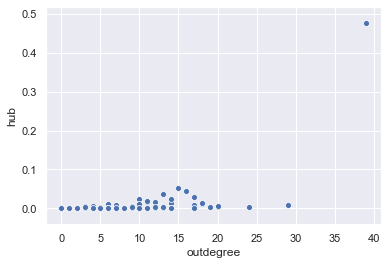

In [90]:
g1.scaplot_nodes('outdegree', 'hub')

In [91]:
with conn.cursor() as cursor:

    keys_movie = {}
    all_keys = []
    keys_used = []
    key_conn = []   #lista com a lista de conecções
    num_conn = []   #lista com numero de filmes iguais

    cursor.execute("SELECT id_filme, id_keyword FROM filme_keyword INNER JOIN filme_genero using (id_filme) WHERE id_genero = %s", id_genero)
    res = cursor.fetchall()

    for filme, key in res:
        if(key in keys_movie):
            keys_movie[key].append(filme)
        else:
            keys_movie[key] = [filme]
        if(key not in all_keys):
            all_keys.append(key)

    for key_value in range(len(all_keys)):
        for comparedk in range(key_value + 1, len(all_keys)):
            num_connections = 0

            if(all_keys[key_value] in keys_movie):
                for movie in keys_movie[all_keys[key_value]]:
                    if(all_keys[comparedk] in keys_movie):
                        if movie in keys_movie[all_keys[comparedk]]:
                            num_connections += 1

            if num_connections > 1:
                if (all_keys[key_value] not in keys_used):
                    keys_used.append(all_keys[key_value])
                if (all_keys[comparedk] not in keys_used):
                    keys_used.append(all_keys[comparedk])
                key_conn.append([all_keys[key_value], all_keys[comparedk]])
                num_conn.append(num_connections)

    #print(key_conn)

    #print(num_conn)

In [92]:
with open('onemode1.gml','w',encoding='utf-8') as file:
    with conn.cursor() as cursor:
        file.write('graph [\n')
        file.write('  directed 0\n')

        for i in keys_used:
            cursor.execute("SELECT nome FROM keyword WHERE id_keyword = %s", i)
            key_name = cursor.fetchone()
            file.write('  node [\n')
            file.write('    id "k_{}"\n'.format(i))
            file.write('    label "{}"\n'.format(unidecode(key_name[0])))
            file.write('  ]\n')

        for i in range(len(key_conn)):
            file.write('  edge [\n')
            file.write('    source "k_{}"\n'.format(key_conn[i][0]))
            file.write('    target "k_{}"\n'.format(key_conn[i][1]))
            file.write('  ]\n')

        file.write(']\n')

In [93]:
g2 = fm.load('onemode1.gml')
g2.set_all_nodes('labpos', 'hover')
g2.move('kamada_kawai')
g2.draw()

#### TODO: na two-mode, desconsiderar keywords que nao estejam relacionadas a filmes no genero dado, aumentar as arestas da one-mode de acordo com o numero de filmes em comum